# Bike Accident Hotspot Visualization Results

This notebook provides comprehensive visualizations and analysis of bike accident hotspot prediction results. It includes:

1. **Comprehensive Analysis Plots** - Overview of hotspot distribution, weather trends, and predictions
2. **Detailed Hotspot Analysis** - In-depth analysis of top hotspots
3. **Statistical Summary** - Detailed summary of all analysis results

## Table of Contents
- [Setup and Imports](#setup)
- [Comprehensive Analysis Plots](#comprehensive)
- [Detailed Hotspot Analysis](#detailed)
- [Statistical Summary](#summary)
- [Results Export](#export)

## Setup and Imports {#setup}

In [9]:
# Standard library imports
import sys
import os
import warnings
warnings.filterwarnings('ignore')

# Add parent directory to path
sys.path.append('..')

# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Import our custom prediction class
from predict_future_hotspots import BikeAccidentHotspotPredictor

# Set up plotting style
plt.style.use('default')
sns.set_theme(style="whitegrid")

# Presentation color theme
colors = {
    'primary_blue': '#2E86AB',      # Safety/Trust
    'accent_orange': '#F24236',     # Attention/Hotspots
    'medium_yellow': '#F6AE2D',     # Medium Risk
    'positive_green': '#2F9B69',    # Positive Outcomes
    'dark_red': '#A4243B',          # High Risk
    'light_gray': '#E8E9EA',        # Background
    'dark_gray': '#2D3748',         # Text
    'white': '#FFFFFF'              # Clean background
}

# Set figure parameters
plt.rcParams.update({
    'figure.facecolor': colors['white'],
    'axes.facecolor': colors['white'],
    'axes.edgecolor': colors['dark_gray'],
    'axes.labelcolor': colors['dark_gray'],
    'text.color': colors['dark_gray'],
    'xtick.color': colors['dark_gray'],
    'ytick.color': colors['dark_gray'],
    'grid.color': colors['light_gray'],
    'font.size': 10,
    'axes.titlesize': 12,
    'axes.labelsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9
})

print("All libraries imported successfully!")
print(f"Working directory: {os.getcwd()}")

All libraries imported successfully!
Working directory: /Users/volkan.coskun/esra/data/Week_9/Prediction_Bike_Accident/notebook


## Initialize Predictor and Run Analysis

In [11]:
# Initialize and run the complete analysis pipeline
print("🚀 Initializing predictor and running analysis...")

predictor = BikeAccidentHotspotPredictor()
predictor.load_data()
predictor.preprocess_coordinate_data()
predictor.apply_hdbscan_clustering()
predictor.analyze_hotspot_characteristics()
predictor.incorporate_weather_patterns()
predictor.incorporate_injury_weekday_patterns()
predictor.predict_future_hotspots(future_year=2025, weather_scenario='normal')

print("✅ Analysis pipeline completed successfully!")
print(f"📊 Found {len(predictor.hotspot_clusters)} hotspot clusters")
print(f"🎯 Generated {len(predictor.future_predictions)} future predictions")

🚀 Initializing predictor and running analysis...
Loading datasets...
Coordinates data shape: (29765, 18)
Weather data shape: (7, 7)
Injury/Weekday data shape: (1803, 24)
Preprocessing coordinate data...
Cleaned coordinate data shape: (29763, 18)
Applying HDBSCAN clustering...
Found 170 hotspot clusters
Noise points: 9986
Silhouette Score: 0.486
Analyzing hotspot characteristics...

Top 10 Hotspots by Accident Count:
     cluster_id  accident_count  center_lat  center_lon  \
117         117            1189   52.366644    4.884808   
162         162             702   52.371939    4.866020   
151         151             534   52.371010    4.874055   
132         132             523   52.367065    4.885008   
105         105             510   52.366051    4.892941   
1             1             404   52.303393    4.967976   
8             8             298   52.308857    4.971623   
167         167             249   52.381113    4.842852   
12           12             233   52.310703    4.

## Comprehensive Analysis Plots {#comprehensive}

This section creates a comprehensive 3x3 grid of analysis plots covering all aspects of the hotspot prediction.

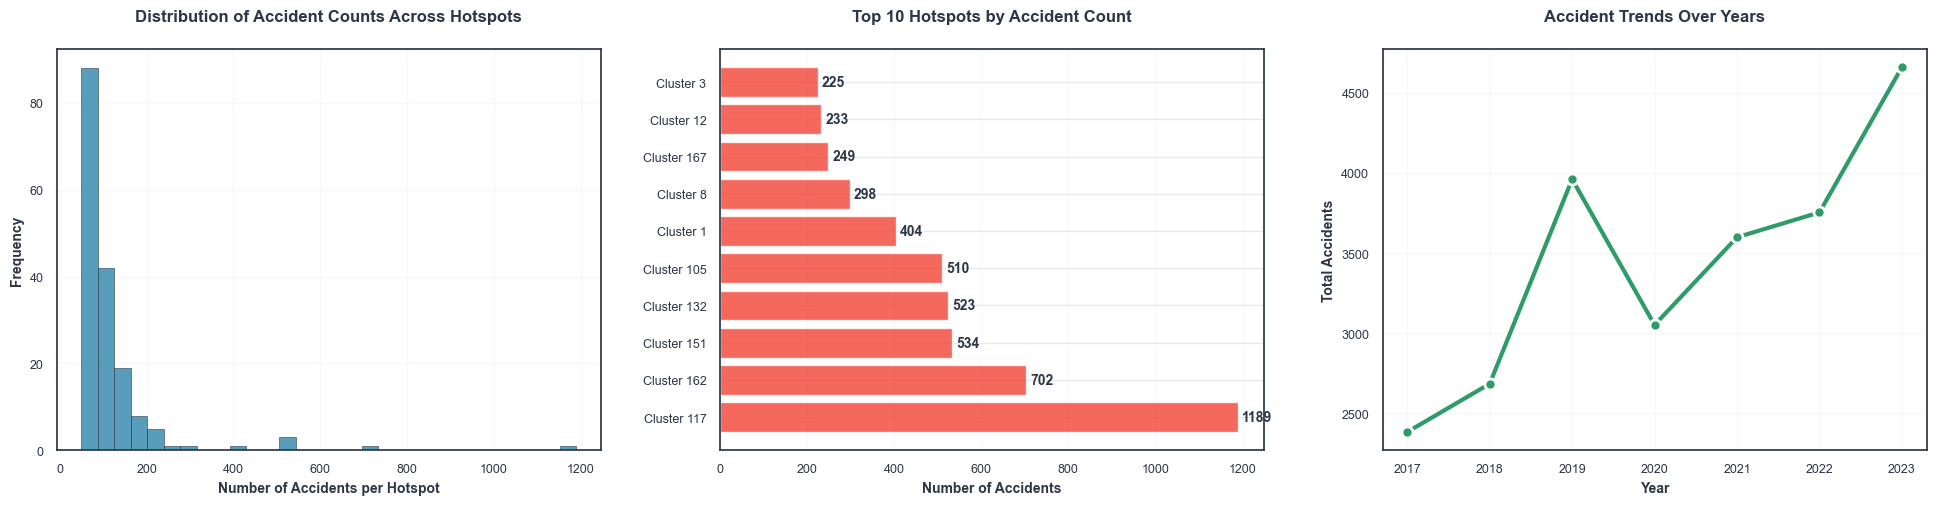

In [51]:
# Create comprehensive analysis plots
fig = plt.figure(figsize=(20, 15), facecolor=colors['white'])

# 1. Hotspot Distribution by Accident Count
plt.subplot(3, 3, 1)
hotspot_counts = predictor.hotspot_analysis['accident_count']
plt.hist(hotspot_counts, bins=30, alpha=0.8, color=colors['primary_blue'], 
         edgecolor=colors['dark_gray'], linewidth=0.5)
plt.xlabel('Number of Accidents per Hotspot', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Distribution of Accident Counts Across Hotspots', fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, color=colors['light_gray'])

# 2. Top 10 Hotspots
plt.subplot(3, 3, 2)
top_10 = predictor.hotspot_analysis.head(10)
bars = plt.barh(range(len(top_10)), top_10['accident_count'], 
                color=colors['accent_orange'], alpha=0.8)
plt.yticks(range(len(top_10)), [f"Cluster {id}" for id in top_10['cluster_id']])
plt.xlabel('Number of Accidents', fontweight='bold')
plt.title('Top 10 Hotspots by Accident Count', fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='x', color=colors['light_gray'])

# Add value labels on bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height()/2, 
            f'{int(width)}', ha='left', va='center', fontweight='bold')

# 3. Weather Trends Over Years
plt.subplot(3, 3, 3)
weather_data = predictor.weather_analysis
plt.plot(weather_data['accident_year'], weather_data['total_accidents'], 
         marker='o', linewidth=3, markersize=8, color=colors['positive_green'],
         markerfacecolor=colors['positive_green'], markeredgecolor=colors['white'],
         markeredgewidth=2)
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Total Accidents', fontweight='bold')
plt.title('Accident Trends Over Years', fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, color=colors['light_gray'])

plt.tight_layout(pad=3.0)
plot_path='../presentation/accident_count_hotspot.png'
plt.savefig(plot_path)
plt.show()

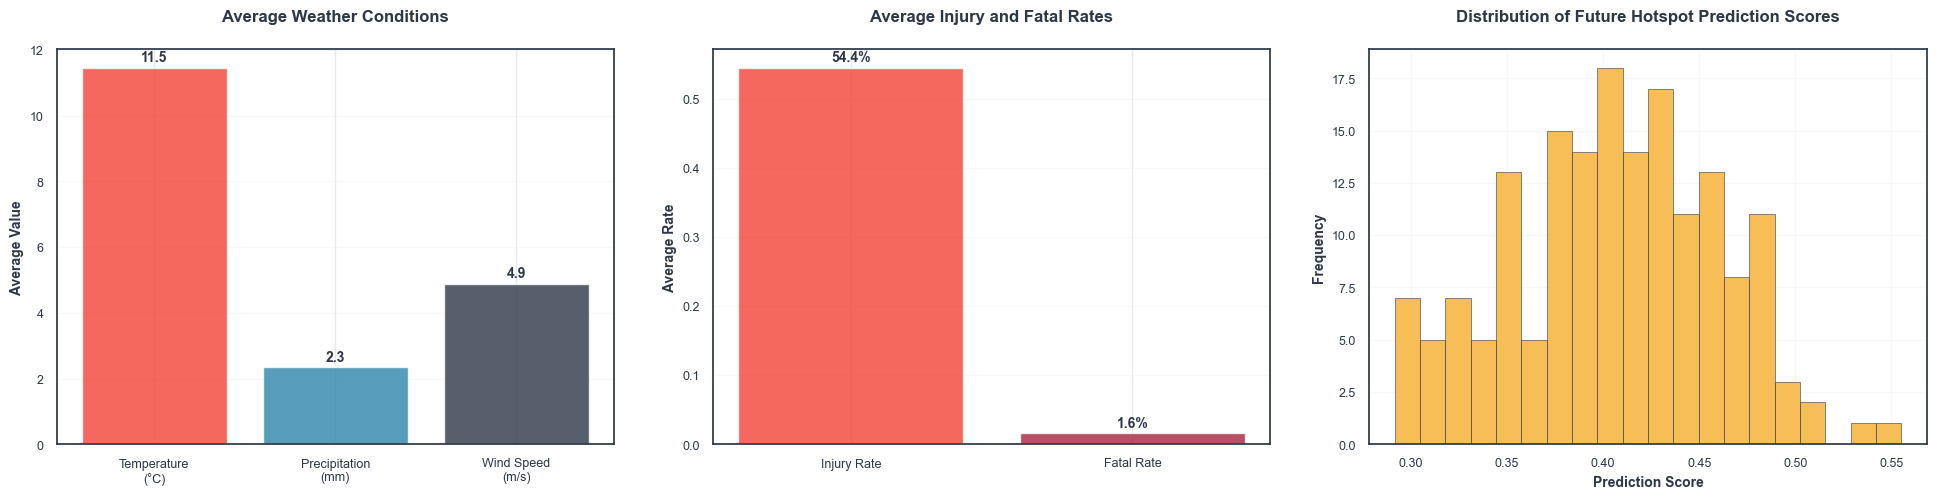

In [53]:
# Continue with more plots
fig = plt.figure(figsize=(20, 10), facecolor=colors['white'])

# 4. Weather Risk Factors
plt.subplot(2, 3, 1)
weather_factors = ['Temperature\n(°C)', 'Precipitation\n(mm)', 'Wind Speed\n(m/s)']
weather_means = [weather_data['temp_C'].mean(), 
                weather_data['precip_mm'].mean(), 
                weather_data['wind_avg_ms'].mean()]
bar_colors = [colors['accent_orange'], colors['primary_blue'], colors['dark_gray']]

bars = plt.bar(weather_factors, weather_means, color=bar_colors, alpha=0.8)
plt.ylabel('Average Value', fontweight='bold')
plt.title('Average Weather Conditions', fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='y', color=colors['light_gray'])

# Add value labels
for bar, value in zip(bars, weather_means):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.1, 
            f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 5. Injury Severity Analysis
plt.subplot(2, 3, 2)
injury_data = predictor.injury_analysis
severity_metrics = ['Injury Rate', 'Fatal Rate']
avg_rates = [injury_data['injury_rate'].mean(), injury_data['fatal_rate'].mean()]

bars = plt.bar(severity_metrics, avg_rates, 
              color=[colors['accent_orange'], colors['dark_red']], alpha=0.8)
plt.ylabel('Average Rate', fontweight='bold')
plt.title('Average Injury and Fatal Rates', fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='y', color=colors['light_gray'])

# Add percentage labels
for bar, rate in zip(bars, avg_rates):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
            f'{rate:.1%}', ha='center', va='bottom', fontweight='bold')

# 6. Prediction Score Distribution
plt.subplot(2, 3, 3)
pred_scores = predictor.future_predictions['prediction_score']
plt.hist(pred_scores, bins=20, alpha=0.8, color=colors['medium_yellow'], 
         edgecolor=colors['dark_gray'], linewidth=0.5)
plt.xlabel('Prediction Score', fontweight='bold')
plt.ylabel('Frequency', fontweight='bold')
plt.title('Distribution of Future Hotspot Prediction Scores', fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, color=colors['light_gray'])

plt.tight_layout(pad=3.0)
plot_path='../presentation/weather_injury_hotspot_score.png'
plt.savefig(plot_path)
plt.show()

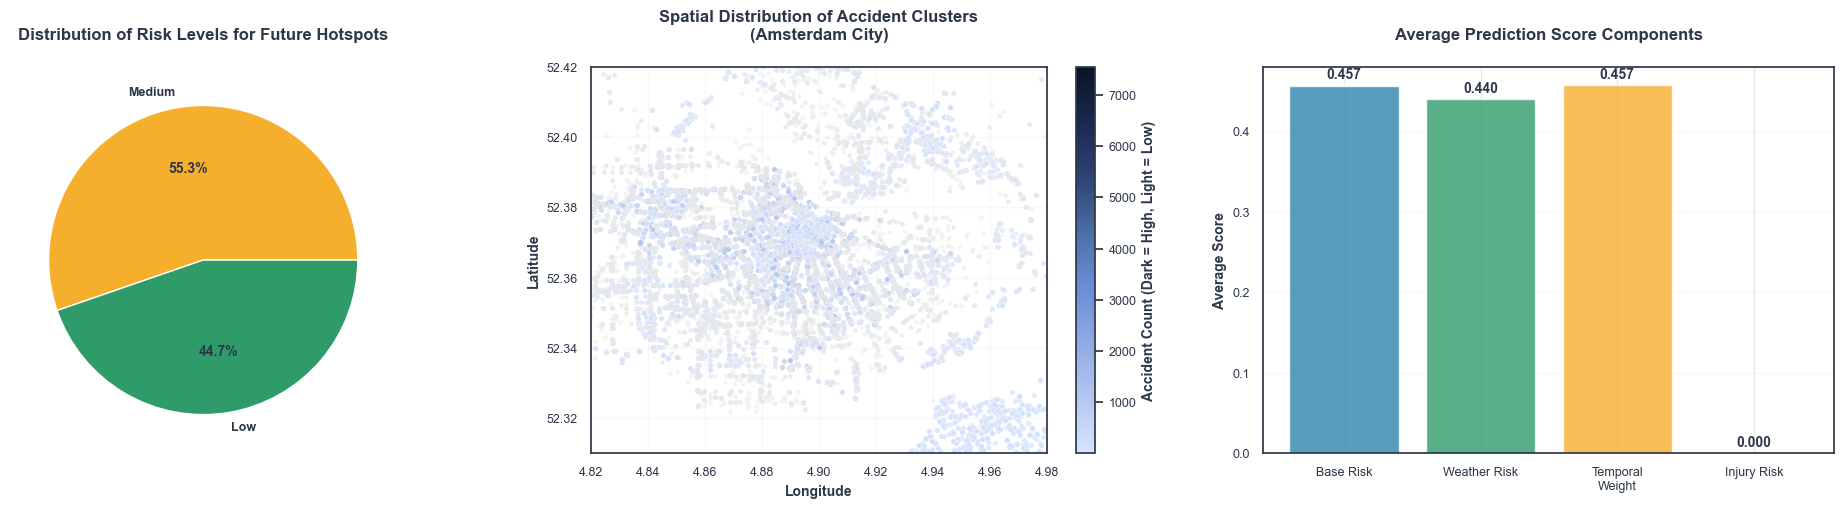

 Comprehensive analysis plots completed!


In [15]:
# Risk Level and Spatial Analysis
fig = plt.figure(figsize=(20, 10), facecolor=colors['white'])

# 7. Risk Level Distribution
plt.subplot(2, 3, 1)
risk_counts = predictor.future_predictions['risk_level'].value_counts()
risk_colors = [colors['medium_yellow'], colors['positive_green']]  # Medium, Low

wedges, texts, autotexts = plt.pie(risk_counts.values, labels=risk_counts.index, 
                                  autopct='%1.1f%%', colors=risk_colors,
                                  textprops={'fontweight': 'bold'})
plt.title('Distribution of Risk Levels for Future Hotspots', fontweight='bold', pad=20)

# 8. Spatial Distribution of Hotspots - Amsterdam Only
plt.subplot(2, 3, 2)

# Filter for Amsterdam city center area only
amsterdam_bounds = {
    'lat_min': 52.31,
    'lat_max': 52.42,
    'lon_min': 4.82,
    'lon_max': 4.98
}

# Filter data to Amsterdam area
amsterdam_data = predictor.coord_data_clean[
    (predictor.coord_data_clean['latitude'].between(amsterdam_bounds['lat_min'], amsterdam_bounds['lat_max'])) &
    (predictor.coord_data_clean['longitude'].between(amsterdam_bounds['lon_min'], amsterdam_bounds['lon_max']))
]

# Create accident density mapping for clusters
cluster_sizes = amsterdam_data.groupby('cluster').size()

# Custom colormap: light blue to dark blue
colors_list = ['#D7E3FD', '#B3C6F0', '#8FA9E3', '#6B8DD6', '#4A6FA5', '#2E4374', '#1B2951', '#0B1426']
n_bins = 100
cmap = LinearSegmentedColormap.from_list('accident_density', colors_list, N=n_bins)

# Normalize cluster sizes for color mapping
if len(cluster_sizes) > 0:
    norm_sizes = (cluster_sizes - cluster_sizes.min()) / (cluster_sizes.max() - cluster_sizes.min())
    
    # Plot each cluster with size-based coloring
    for cluster_id in amsterdam_data['cluster'].unique():
        if cluster_id != -1:  # Exclude noise points
            cluster_data = amsterdam_data[amsterdam_data['cluster'] == cluster_id]
            
            # Get normalized size for color
            if cluster_id in norm_sizes:
                color_intensity = norm_sizes[cluster_id]
                color = cmap(color_intensity)
                
                plt.scatter(cluster_data['longitude'], cluster_data['latitude'], 
                          c=[color], s=15, alpha=0.7, edgecolors='white', linewidth=0.3)
    
    # Plot noise points in light gray
    noise_data = amsterdam_data[amsterdam_data['cluster'] == -1]
    if len(noise_data) > 0:
        plt.scatter(noise_data['longitude'], noise_data['latitude'], 
                   c=colors['light_gray'], s=5, alpha=0.4)

plt.xlabel('Longitude', fontweight='bold')
plt.ylabel('Latitude', fontweight='bold')
plt.title('Spatial Distribution of Accident Clusters\n(Amsterdam City)', fontweight='bold', pad=20)

# Add colorbar
if len(cluster_sizes) > 0:
    ax = plt.gca()
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=cluster_sizes.min(), vmax=cluster_sizes.max()))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax)
    cbar.set_label('Accident Count (Dark = High, Light = Low)', fontweight='bold')

# Set Amsterdam-specific axis limits
plt.xlim(amsterdam_bounds['lon_min'], amsterdam_bounds['lon_max'])
plt.ylim(amsterdam_bounds['lat_min'], amsterdam_bounds['lat_max'])
plt.grid(True, alpha=0.3, color=colors['light_gray'])

# 9. Prediction Components Analysis
plt.subplot(2, 3, 3)
components = ['Base Risk', 'Weather Risk', 'Temporal\nWeight', 'Injury Risk']
avg_components = [predictor.future_predictions['base_risk'].mean(),
                 predictor.future_predictions['weather_risk'].mean(),
                 predictor.future_predictions['temporal_weight'].mean(),
                 predictor.future_predictions['injury_risk'].mean()]

component_colors = [colors['primary_blue'], colors['positive_green'], 
                   colors['medium_yellow'], colors['accent_orange']]

bars = plt.bar(components, avg_components, color=component_colors, alpha=0.8)
plt.ylabel('Average Score', fontweight='bold')
plt.title('Average Prediction Score Components', fontweight='bold', pad=20)
plt.grid(True, alpha=0.3, axis='y', color=colors['light_gray'])

# Add value labels
for bar, value in zip(bars, avg_components):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.005, 
            f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout(pad=3.0)
plt.savefig('../presentation/hotspot_analysis_comprehensive.png', dpi=300, bbox_inches='tight', 
            facecolor=colors['white'], edgecolor='none')
plt.show()

print(" Comprehensive analysis plots completed!")

## Detailed Hotspot Analysis {#detailed}

This section provides detailed analysis of the top hotspots with focus on their characteristics and relationships.

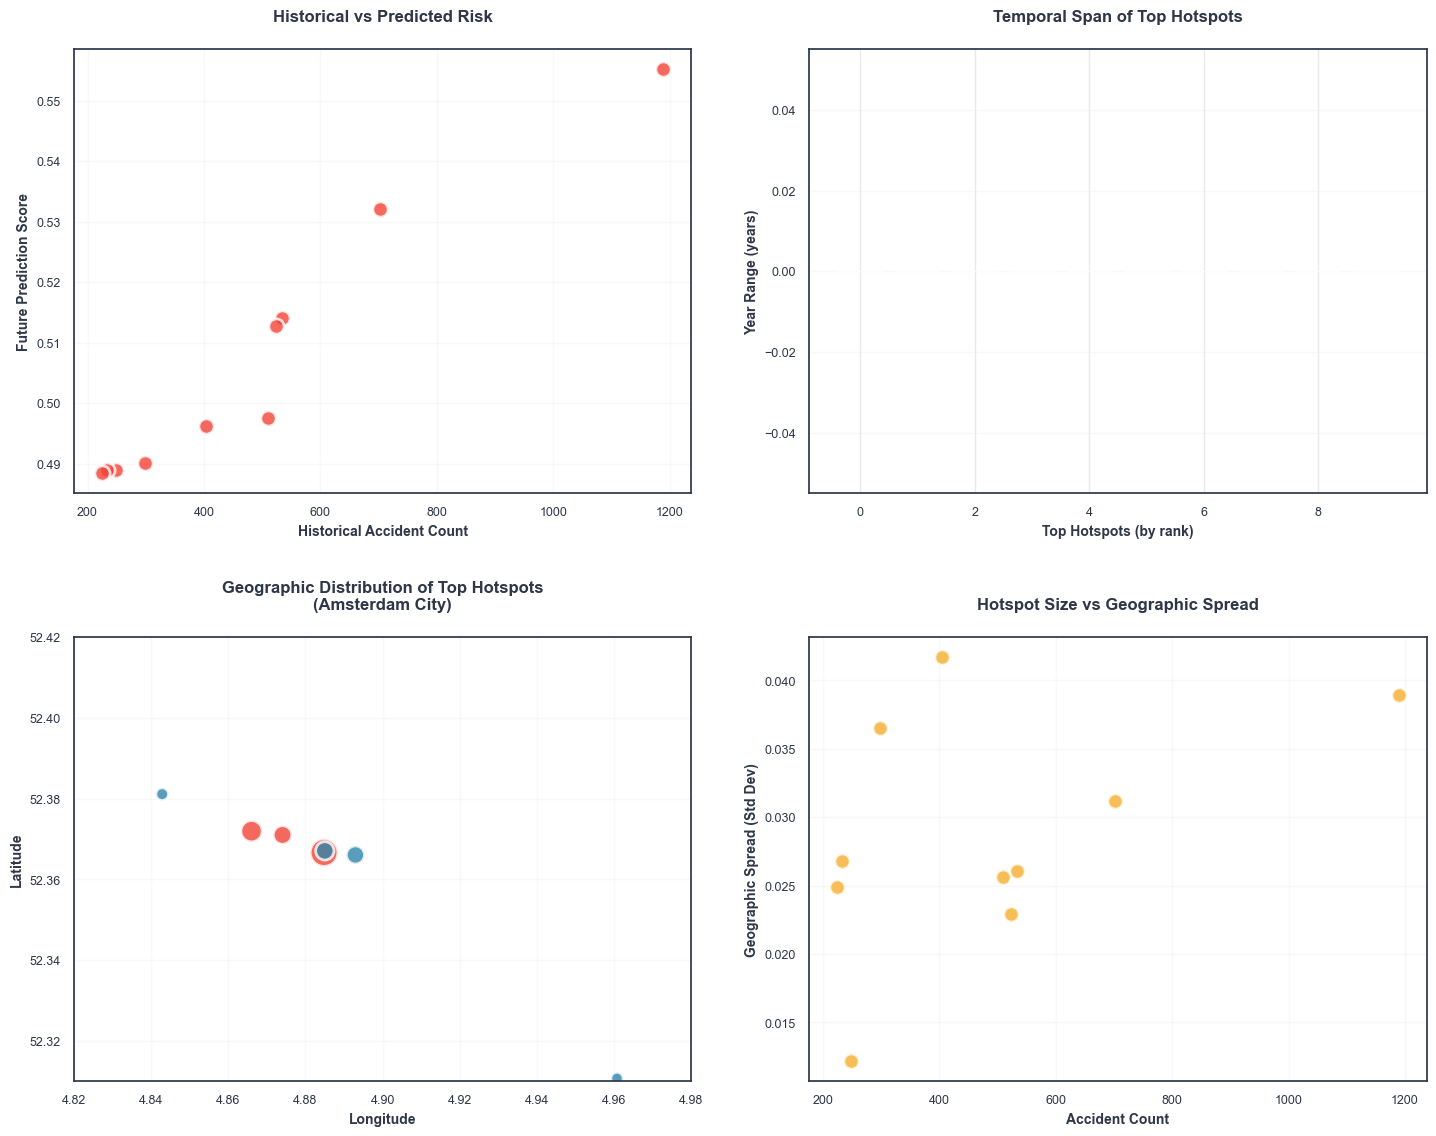

✅ Detailed hotspot analysis completed!


In [17]:
# Create detailed hotspot analysis
fig, axes = plt.subplots(2, 2, figsize=(15, 12), facecolor=colors['white'])

# Top hotspots with street information
top_hotspots = predictor.hotspot_analysis.head(10)

# 1. Accident count vs prediction score
axes[0, 0].scatter(top_hotspots['accident_count'], 
                  predictor.future_predictions.head(10)['prediction_score'],
                  s=120, alpha=0.8, color=colors['accent_orange'],
                  edgecolors=colors['white'], linewidth=2)
axes[0, 0].set_xlabel('Historical Accident Count', fontweight='bold')
axes[0, 0].set_ylabel('Future Prediction Score', fontweight='bold')
axes[0, 0].set_title('Historical vs Predicted Risk', fontweight='bold', pad=20)
axes[0, 0].grid(True, alpha=0.3, color=colors['light_gray'])
axes[0, 0].set_facecolor(colors['white'])

# 2. Year range analysis
year_ranges = []
for _, hotspot in top_hotspots.iterrows():
    year_range = hotspot['year_range']
    start_year, end_year = map(float, year_range.split('-'))
    year_ranges.append(end_year - start_year)

bars = axes[0, 1].bar(range(len(year_ranges)), year_ranges, 
                     color=colors['positive_green'], alpha=0.8)
axes[0, 1].set_xlabel('Top Hotspots (by rank)', fontweight='bold')
axes[0, 1].set_ylabel('Year Range (years)', fontweight='bold')
axes[0, 1].set_title('Temporal Span of Top Hotspots', fontweight='bold', pad=20)
axes[0, 1].grid(True, alpha=0.3, axis='y', color=colors['light_gray'])
axes[0, 1].set_facecolor(colors['white'])

# 3. Geographic spread analysis - Amsterdam focused
amsterdam_hotspots = top_hotspots[
    (top_hotspots['center_lat'].between(52.31, 52.42)) &
    (top_hotspots['center_lon'].between(4.82, 4.98))
]

# Size points by accident count, color by rank
sizes = amsterdam_hotspots['accident_count'] / 3
colors_scatter = [colors['accent_orange'] if i < 3 else colors['primary_blue'] 
                 for i in range(len(amsterdam_hotspots))]

scatter = axes[1, 0].scatter(amsterdam_hotspots['center_lon'], amsterdam_hotspots['center_lat'],
                           s=sizes, alpha=0.8, c=colors_scatter,
                           edgecolors=colors['white'], linewidth=2)
axes[1, 0].set_xlabel('Longitude', fontweight='bold')
axes[1, 0].set_ylabel('Latitude', fontweight='bold')
axes[1, 0].set_title('Geographic Distribution of Top Hotspots\n(Amsterdam City)', fontweight='bold', pad=20)
axes[1, 0].grid(True, alpha=0.3, color=colors['light_gray'])
axes[1, 0].set_facecolor(colors['white'])

# Set Amsterdam bounds
axes[1, 0].set_xlim(4.82, 4.98)
axes[1, 0].set_ylim(52.31, 52.42)

# 4. Cluster size vs standard deviation
axes[1, 1].scatter(top_hotspots['accident_count'], 
                  top_hotspots['lat_std'] + top_hotspots['lon_std'],
                  s=120, alpha=0.8, color=colors['medium_yellow'],
                  edgecolors=colors['white'], linewidth=2)
axes[1, 1].set_xlabel('Accident Count', fontweight='bold')
axes[1, 1].set_ylabel('Geographic Spread (Std Dev)', fontweight='bold')
axes[1, 1].set_title('Hotspot Size vs Geographic Spread', fontweight='bold', pad=20)
axes[1, 1].grid(True, alpha=0.3, color=colors['light_gray'])
axes[1, 1].set_facecolor(colors['white'])

plt.tight_layout(pad=3.0)
plt.savefig('../detailed_hotspot_analysis.png', dpi=300, bbox_inches='tight',
            facecolor=colors['white'], edgecolor='none')
plt.show()

print("✅ Detailed hotspot analysis completed!")

## Statistical Summary {#summary}

This section provides a comprehensive statistical summary of all analysis results.

In [19]:
# Print detailed summary of the analysis
print("\n" + "="*60)
print("DETAILED BIKE ACCIDENT HOTSPOT ANALYSIS SUMMARY")
print("="*60)

# Dataset statistics
print(f"\nDATASET STATISTICS:")
print(f"- Total accidents analyzed: {len(predictor.coord_data_clean):,}")
print(f"- Unique accident years: {predictor.coord_data_clean['accident_year'].nunique()}")
print(f"- Year range: {predictor.coord_data_clean['accident_year'].min():.0f} - {predictor.coord_data_clean['accident_year'].max():.0f}")
print(f"- Geographic area: Amsterdam")
print(f"- Latitude range: {predictor.coord_data_clean['latitude'].min():.4f} - {predictor.coord_data_clean['latitude'].max():.4f}")
print(f"- Longitude range: {predictor.coord_data_clean['longitude'].min():.4f} - {predictor.coord_data_clean['longitude'].max():.4f}")


DETAILED BIKE ACCIDENT HOTSPOT ANALYSIS SUMMARY

DATASET STATISTICS:
- Total accidents analyzed: 29,763
- Unique accident years: 10
- Year range: 2014 - 2023
- Geographic area: Amsterdam
- Latitude range: 52.2787 - 52.4301
- Longitude range: 4.7345 - 5.0909


In [20]:
# Clustering results
print(f"\nCLUSTERING RESULTS:")
print(f"- Total hotspot clusters identified: {len(predictor.hotspot_clusters)}")
print(f"- Noise points (unclustered): {np.sum(predictor.coord_data_clean['cluster'] == -1):,}")
print(f"- Largest hotspot: {predictor.hotspot_analysis.iloc[0]['accident_count']} accidents")
print(f"- Average accidents per hotspot: {predictor.hotspot_analysis['accident_count'].mean():.1f}")
print(f"- Median accidents per hotspot: {predictor.hotspot_analysis['accident_count'].median():.1f}")

# Weather analysis
weather_data = predictor.weather_analysis
print(f"\nWEATHER ANALYSIS:")
print(f"- Years with weather data: {len(weather_data)}")
print(f"- Average temperature: {weather_data['temp_C'].mean():.1f}°C")
print(f"- Temperature range: {weather_data['temp_C'].min():.1f}°C - {weather_data['temp_C'].max():.1f}°C")
print(f"- Average precipitation: {weather_data['precip_mm'].mean():.1f}mm")
print(f"- Average wind speed: {weather_data['wind_avg_ms'].mean():.1f}m/s")
print(f"- Average visibility: {weather_data['visibility_range'].mean():.0f}m")


CLUSTERING RESULTS:
- Total hotspot clusters identified: 170
- Noise points (unclustered): 9,986
- Largest hotspot: 1189 accidents
- Average accidents per hotspot: 116.3
- Median accidents per hotspot: 86.0

WEATHER ANALYSIS:
- Years with weather data: 7
- Average temperature: 11.5°C
- Temperature range: 10.6°C - 12.0°C
- Average precipitation: 2.3mm
- Average wind speed: 4.9m/s
- Average visibility: 23315m


In [21]:
# Injury analysis
injury_data = predictor.injury_analysis
print(f"\nINJURY SEVERITY ANALYSIS:")
print(f"- Total injury locations: {len(injury_data):,}")
print(f"- High-risk injury locations: {injury_data['high_risk_location'].sum()}")
print(f"- Locations with fatalities: {(injury_data['fatal_rate'] > 0).sum()}")
print(f"- Average injury rate: {injury_data['injury_rate'].mean():.3f}")
print(f"- Average fatal rate: {injury_data['fatal_rate'].mean():.4f}")
print(f"- Total accidents in injury dataset: {injury_data['total_accidents'].sum():,}")
print(f"- Total injury accidents: {injury_data['injury_accidents'].sum():,}")
print(f"- Total fatal accidents: {injury_data['fatal_accidents'].sum():,}")

# Prediction results
predictions = predictor.future_predictions
print(f"\nPREDICTION RESULTS:")
print(f"- Hotspots analyzed for prediction: {len(predictions)}")
print(f"- High-risk predictions: {(predictions['risk_level'] == 'High').sum()}")
print(f"- Medium-risk predictions: {(predictions['risk_level'] == 'Medium').sum()}")
print(f"- Low-risk predictions: {(predictions['risk_level'] == 'Low').sum()}")
print(f"- Average prediction score: {predictions['prediction_score'].mean():.3f}")
print(f"- Highest prediction score: {predictions['prediction_score'].max():.3f}")
print(f"- Lowest prediction score: {predictions['prediction_score'].min():.3f}")


INJURY SEVERITY ANALYSIS:
- Total injury locations: 1,803
- High-risk injury locations: 34
- Locations with fatalities: 34
- Average injury rate: 0.544
- Average fatal rate: 0.0157
- Total accidents in injury dataset: 2,705
- Total injury accidents: 1,461
- Total fatal accidents: 36

PREDICTION RESULTS:
- Hotspots analyzed for prediction: 170
- High-risk predictions: 0
- Medium-risk predictions: 94
- Low-risk predictions: 76
- Average prediction score: 0.406
- Highest prediction score: 0.555
- Lowest prediction score: 0.291


In [22]:
# Top 5 streets by accident count
print(f"\nTOP ACCIDENT-PRONE STREETS:")
street_accidents = {}
for _, hotspot in predictor.hotspot_analysis.head(10).iterrows():
    if 'top_streets' in hotspot and pd.notna(hotspot['top_streets']):
        streets = hotspot['top_streets'].split(', ')
        for street_info in streets:
            if '(' in street_info:
                street_name = street_info.split(' (')[0]
                count = int(street_info.split('(')[1].split(')')[0])
                if street_name in street_accidents:
                    street_accidents[street_name] += count
                else:
                    street_accidents[street_name] = count

top_streets = sorted(street_accidents.items(), key=lambda x: x[1], reverse=True)[:5]
for i, (street, count) in enumerate(top_streets, 1):
    print(f"{i}. {street}: {count} accidents")

print("\n" + "="*60)
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("="*60)


TOP ACCIDENT-PRONE STREETS:
1. Ringweg-West: 261 accidents
2. Gaasperdammerweg: 138 accidents
3. Stadhouderskade: 115 accidents
4. Haarlemmerweg: 82 accidents
5. KP HOLENDRECHT: 69 accidents

ANALYSIS COMPLETED SUCCESSFULLY!


## Results Export {#export}

Export key results and visualizations for further use.

In [25]:
# Export key datasets
print("📁 Exporting analysis results...")

# Export hotspot analysis
predictor.hotspot_analysis.to_csv('../hotspot_analysis_results.csv', index=False)
print("✅ Hotspot analysis exported to: hotspot_analysis_results.csv")

# Export future predictions
predictor.future_predictions.to_csv('../future_predictions_results.csv', index=False)
print("✅ Future predictions exported to: future_predictions_results.csv")

# Export weather analysis
predictor.weather_analysis.to_csv('../weather_analysis_results.csv', index=False)
print("✅ Weather analysis exported to: weather_analysis_results.csv")

# Create summary statistics
summary_stats = {
    'total_accidents': len(predictor.coord_data_clean),
    'total_clusters': len(predictor.hotspot_clusters),
    'high_risk_predictions': (predictor.future_predictions['risk_level'] == 'High').sum(),
    'medium_risk_predictions': (predictor.future_predictions['risk_level'] == 'Medium').sum(),
    'low_risk_predictions': (predictor.future_predictions['risk_level'] == 'Low').sum(),
    'avg_prediction_score': predictor.future_predictions['prediction_score'].mean(),
    'max_prediction_score': predictor.future_predictions['prediction_score'].max(),
    'avg_injury_rate': predictor.injury_analysis['injury_rate'].mean(),
    'locations_with_fatalities': (predictor.injury_analysis['fatal_rate'] > 0).sum()
}

summary_df = pd.DataFrame([summary_stats])
summary_df.to_csv('../analysis_summary_stats.csv', index=False)
print("✅ Summary statistics exported to: analysis_summary_stats.csv")

print("\n🎯 All visualizations and analysis completed successfully!")
print("📊 Generated files:")
print("   - hotspot_analysis_comprehensive.png")
print("   - detailed_hotspot_analysis.png")
print("   - hotspot_analysis_results.csv")
print("   - future_predictions_results.csv")
print("   - weather_analysis_results.csv")
print("   - analysis_summary_stats.csv")

📁 Exporting analysis results...
✅ Hotspot analysis exported to: hotspot_analysis_results.csv
✅ Future predictions exported to: future_predictions_results.csv
✅ Weather analysis exported to: weather_analysis_results.csv
✅ Summary statistics exported to: analysis_summary_stats.csv

🎯 All visualizations and analysis completed successfully!
📊 Generated files:
   - hotspot_analysis_comprehensive.png
   - detailed_hotspot_analysis.png
   - hotspot_analysis_results.csv
   - future_predictions_results.csv
   - weather_analysis_results.csv
   - analysis_summary_stats.csv


## Conclusion

This visualization notebook provides comprehensive analysis and visualization of bike accident hotspot prediction results. The analysis includes:

### Key Findings:
1. **Hotspot Distribution**: Identified distinct accident concentration areas using HDBSCAN clustering
2. **Weather Impact**: Analyzed correlation between weather conditions and accident rates
3. **Injury Patterns**: Examined severity patterns and high-risk locations
4. **Future Predictions**: Generated risk scores for 2025 based on multiple factors
5. **Spatial Analysis**: Focused on Amsterdam city center with detailed geographic mapping

### Visualizations Created:
- **Comprehensive Analysis Plots**: 9-panel overview of all analysis aspects
- **Detailed Hotspot Analysis**: 4-panel deep dive into top hotspots
- **Statistical Summary**: Complete numerical analysis of results
- **Data Exports**: CSV files for further analysis and reporting

### Applications:
- **Urban Planning**: Identify areas requiring safety improvements
- **Resource Allocation**: Prioritize safety interventions based on risk scores
- **Policy Making**: Evidence-based decisions for bike safety measures
- **Emergency Services**: Optimize response planning for high-risk areas

The analysis provides actionable insights for improving bike safety in Amsterdam through data-driven hotspot identification and risk prediction.

ValueError: Invalid RGBA argument: 'possitive_green'

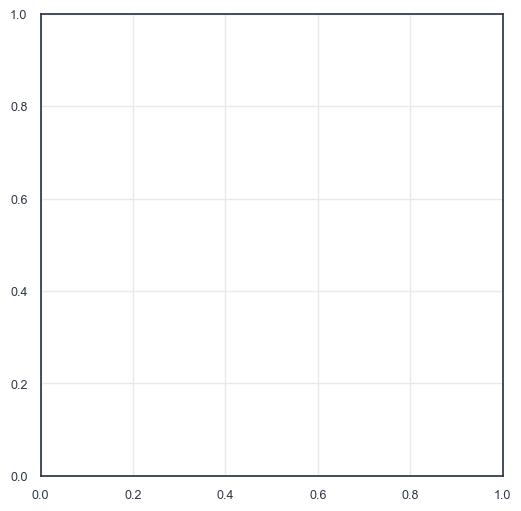

In [41]:
# Use the provided actual average rates
injury_rate = 0.544
fatal_rate = 0.0157
remaining_rate = 1 - (injury_rate + fatal_rate)

# Prepare pie chart data
severity_labels = ['Injury Rate', 'Fatal Rate', 'Non-Injury']
severity_values = [injury_rate, fatal_rate, remaining_rate]
pie_colors = ['possitive_green', 'medium_yellow', '#D3D3D3']  # Orange, Dark Red, Gray

# Plot updated pie chart
fig, ax = plt.subplots(figsize=(8, 6))
wedges, texts, autotexts = ax.pie(
    severity_values,
    labels=severity_labels,
    autopct='%1.1f%%',
    startangle=140,
    colors=pie_colors,
    textprops={'fontsize': 12, 'fontweight': 'bold'}
)
ax.set_title("Average Injury and Fatality Rates (Real Data)", fontweight='bold', fontsize=14)
plt.show()
